In [1]:
import os

# You can use 'tensorflow', 'torch' or 'jax' as backend. Make sure to set the environment variable before importing.
os.environ["KERAS_BACKEND"] = "torch"

import keras_core
import mlflow
import numpy as np



Using PyTorch backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras_core.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
x_train[0].shape


(28, 28, 1)

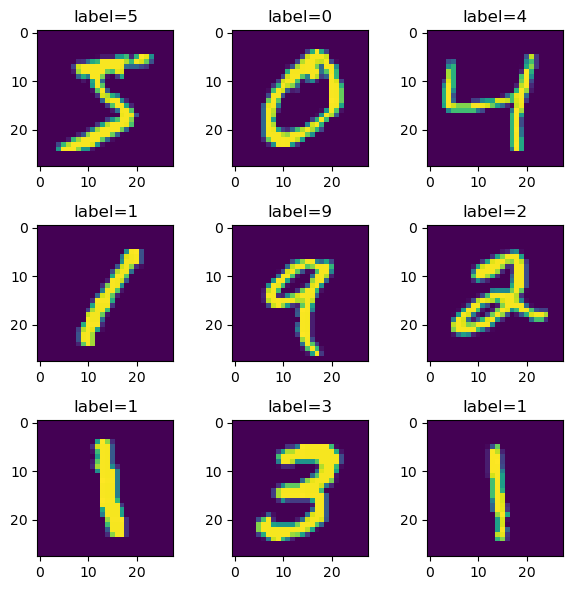

In [3]:
# Visualize Dataset
import matplotlib.pyplot as plt

grid = 3
fig, axes = plt.subplots(grid, grid, figsize=(6, 6))
for i in range(grid):
    for j in range(grid):
        axes[i][j].imshow(x_train[i * grid + j])
        axes[i][j].set_title(f"label={y_train[i * grid + j]}")
plt.tight_layout()


In [4]:
NUM_CLASSES = 10
INPUT_SHAPE = (28, 28, 1)


def initialize_model():
    INPUT_SHAPE = (100, 100, 1)  # Assuming grayscale images of 100x100 pixels
    model = models.Sequential(
        [
            layers.Input(shape=INPUT_SHAPE),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D((2, 2)),
            # Add more Conv2D or MaxPooling2D layers as needed
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(6)  # Predicting 6 values for the vertices
        ]
    )
    return model

model = initialize_model()


model = initialize_model()
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)        │        320 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)        │      9,248 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 32)        │      9,248 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_average_pooling2d        │ (None, 32)                │          0 │
│ (GlobalAveragePooling2D)        │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 10)                │        330 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 19,146 (74.79 KB)

 Trainable params: 19,146 (74.79 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
BATCH_SIZE = 64  # adjust this based on the memory of your machine
EPOCHS = 3


In [6]:
model = initialize_model()

model.compile(
    loss=keras_core.losses.SparseCategoricalCrossentropy(),
    optimizer=keras_core.optimizers.Adam(),
    metrics=["accuracy"],
)

run = mlflow.start_run()
model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=0.1,
    callbacks=[mlflow.keras_core.MLflowCallback(run)],
)
mlflow.end_run()


Epoch 1/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.5653 - loss: 1.4043 - val_accuracy: 0.9183 - val_loss: 0.2728
Epoch 2/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.9217 - loss: 0.2726 - val_accuracy: 0.9457 - val_loss: 0.1795
Epoch 3/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9405 - loss: 0.2014 - val_accuracy: 0.9553 - val_loss: 0.1516
